In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os

In [4]:
FD_RES = "/home/mount/work/out/proj_combeffect"
fdiry = os.path.join(FD_RES, "model_linear")
fname = "res_interactive_chr17.tsv"
fpath = os.path.join(fdiry, fname)

In [5]:
dat_stats_chr17 = pd.read_csv(fpath, sep="\t")
dat_stats_chr17.head()

motif1      motif2  Estimate   t value  Raw_pvalue  Adjusted_pvalue
0   AIRE       AP1/1 -0.000197 -5.407052    0.000020         0.000187
1   AIRE       AP1/2  0.000022  0.547442    0.589586         0.650118
2   AIRE  CREB/ATF/2 -0.000068 -6.435491    0.000002         0.000036
3   AIRE        CTCF -0.000058 -0.679255    0.504061         0.571884
4   AIRE       CUX/1  0.000008  1.705230    0.106355         0.163098

In [16]:
dat = dat_stats_chr17.assign(
    nlogadjpval = lambda x: -np.log10(x.Adjusted_pvalue),
    motif = lambda x: x.motif1 + " | " + x.motif2)
dat.head()

motif1      motif2  Estimate   t value  Raw_pvalue  Adjusted_pvalue  \
0   AIRE       AP1/1 -0.000197 -5.407052    0.000020         0.000187   
1   AIRE       AP1/2  0.000022  0.547442    0.589586         0.650118   
2   AIRE  CREB/ATF/2 -0.000068 -6.435491    0.000002         0.000036   
3   AIRE        CTCF -0.000058 -0.679255    0.504061         0.571884   
4   AIRE       CUX/1  0.000008  1.705230    0.106355         0.163098   

   nlogadjpval              motif  
0     3.728789       AIRE | AP1/1  
1     0.187008       AIRE | AP1/2  
2     4.443321  AIRE | CREB/ATF/2  
3     0.242692        AIRE | CTCF  
4     0.787551       AIRE | CUX/1

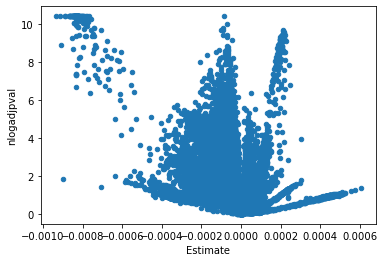

In [7]:
dat.plot.scatter("Estimate", "nlogadjpval")

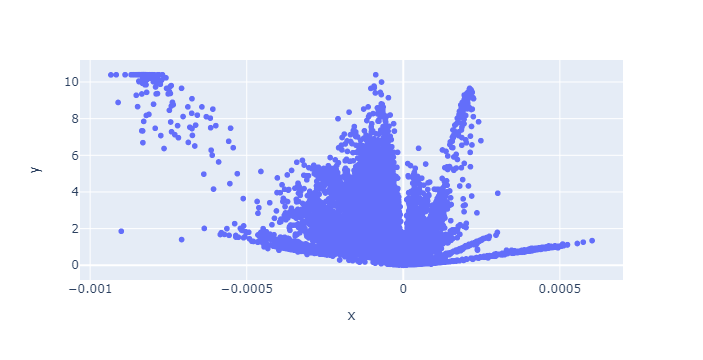

In [11]:
fig = px.scatter(x=dat.Estimate, y=dat.nlogadjpval)
fig.show()

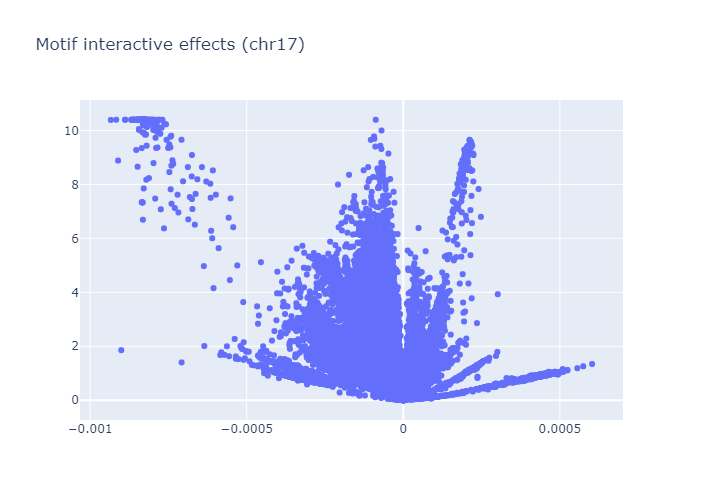

In [17]:
fig = go.Figure(data=go.Scatter(x=dat.Estimate,
                                y=dat.nlogadjpval,
                                mode='markers',
                                #marker_color=data['Population'],
                                text=dat.motif)) # hover text goes here

fig.update_layout(title='Motif interactive effects (chr17)',
                  width=500,
                  height=500)
fig.show()